# 3.2 범죄율로 집값 예측하기 (기초 회귀 문제)

- 작성자: [김찬란](https://github.com/seriousran)

In [1]:
# 코드 3-10 패키지 임포트

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.layers import Input, Dense
from keras.models import Model
from keras import metrics

%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


In [2]:
# 코드 3-11 보스턴 데이터셋 불러오기

from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

57344/57026 [==============================] - 0s 2us/step


In [0]:
# 코드 3-12 Pandas DataFrame 만들기

train_df = pd.DataFrame(data=x_train, columns=cols)
test_df = pd.DataFrame(data=x_test, columns=cols)

In [4]:
# 코드 3-13 Pandas head() 함수

train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [5]:
# 코드 3-14 Pandas DataFrame의 모양

train_df.shape

(404, 13)

In [0]:
# 코드 3-15 부분 데이터 추출 방법-1

x_train_crim = x_train[:,0]
x_test_crim = x_test[:,0]

In [0]:
# 코드 3-16 부분 데이터 추출 방법-2

x_train_crim = train_df['CRIM'].values
x_test_crim = test_df['CRIM'].values

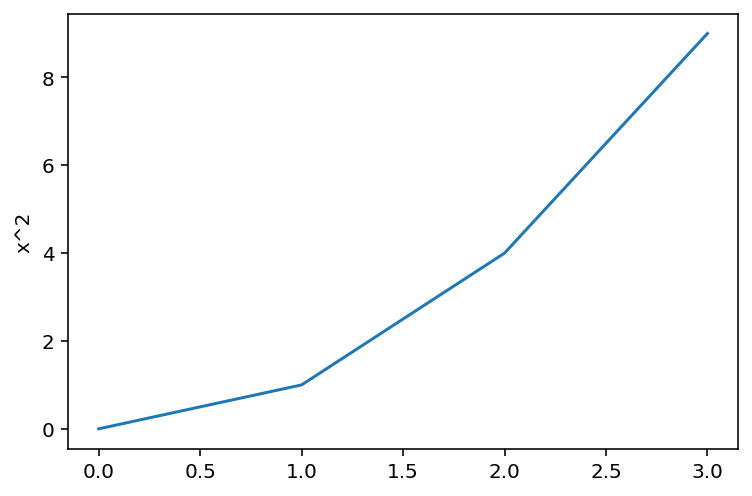

In [8]:
# 코드 3-17 Matpyplot의 예-1

plt.plot([0, 1, 2, 3], [0, 1, 4, 9])
plt.ylabel('x^2')
plt.show()

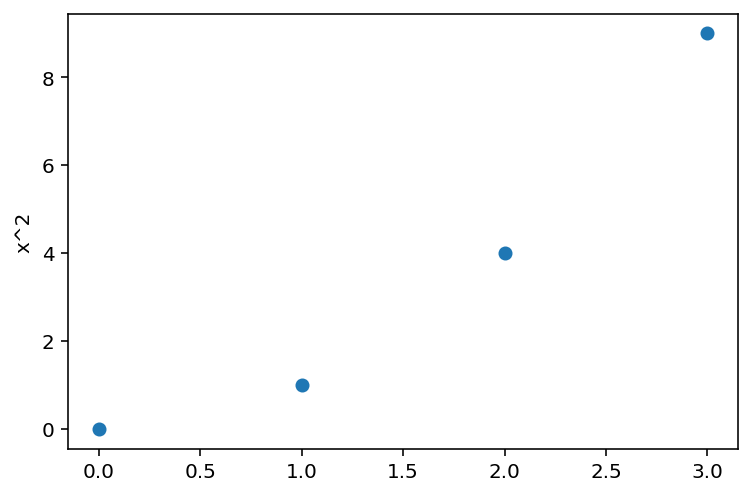

In [9]:
# 코드 3-18 Matpyplot의 예-2

x = np.array([0, 1, 2, 3])
y = x**2
plt.plot(x, y, 'o')
plt.ylabel('x^2')
plt.show()

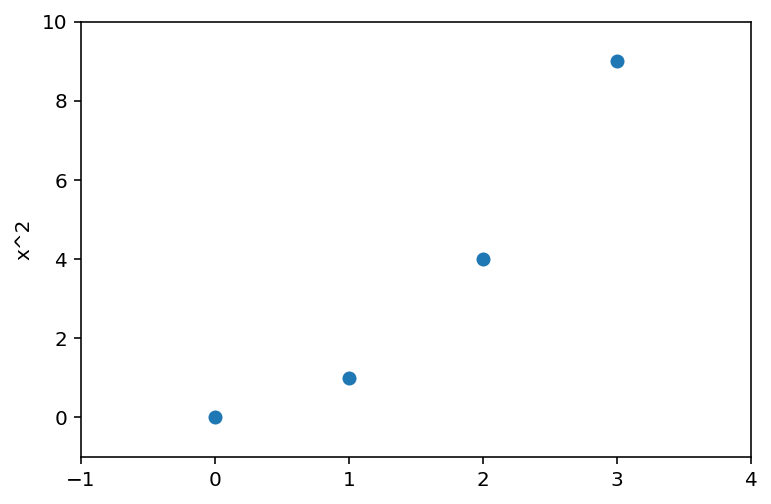

In [10]:
# 코드 3-19 Matpyplot의 예-3

plt.plot([0, 1, 2, 3], [0, 1, 4, 9], 'o')
plt.ylabel('x^2')
plt.axis([-1, 4, -1, 10])
plt.show()

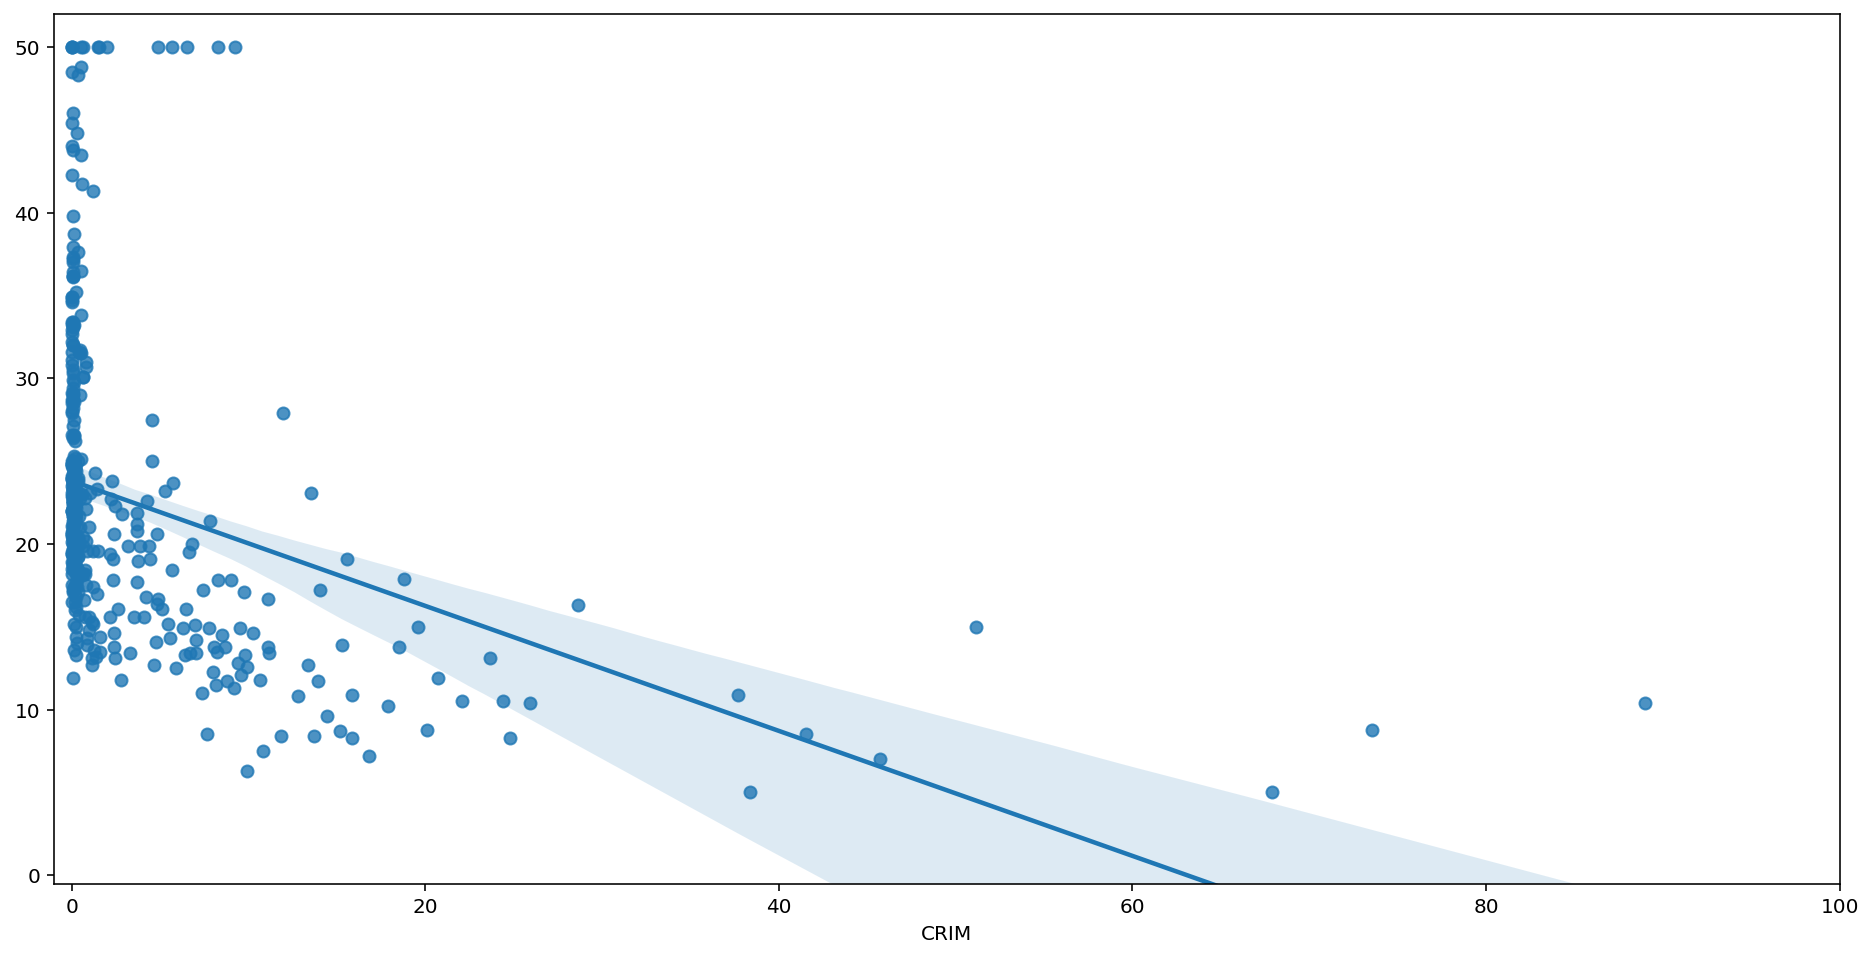

In [11]:
# 코드 3-20 Seaborn을 활용한 집값과 범죄율의 회귀 그래프

plt.figure(figsize=(16,8))
plt.axis([-1,100,-0.5,52])
sns.regplot(train_df['CRIM'], y_train)
plt.show()

In [12]:
# 코드 3-21 케라스 인공신경망 모델링 예-1

inputs = Input(shape=(1,))
    
fc1 = Dense(10, activation='relu')(inputs)
fc2 = Dense(30, activation='relu')(fc1)
outputs = Dense(1)(fc2)

model = Model(inputs=inputs, outputs=outputs)

In [13]:
# 코드 3-22 모델 요약

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 3-23 모델 컴파일

model.compile(optimizer = 'RMSprop', loss='mean_squared_error')

In [15]:
# 3-24 모델 학습

history = model.fit(x_train_crim, y_train, epochs=30,
                    batch_size=8)




Epoch 1/30





404/404 [==============================] - 1s 1ms/step - loss: 567.8308
Epoch 2/30
404/404 [==============================] - 0s 119us/step - loss: 539.5525
Epoch 3/30
404/404 [==============================] - 0s 118us/step - loss: 529.8820
Epoch 4/30
404/404 [==============================] - 0s 124us/step - loss: 517.0419
Epoch 5/30
404/404 [==============================] - 0s 151us/step - loss: 504.0471
Epoch 6/30
404/404 [==============================] - 0s 135us/step - loss: 489.5208
Epoch 7/30
404/404 [==============================] - 0s 117us/step - loss: 473.7581
Epoch 8/30
404/404 [==============================] - 0s 149us/step - loss: 456.5369
Epoch 9/30
404/404 [==============================] - 0s 147us/step - loss: 440.3799
Epoch 10/30
404/404 [==============================] - 0s 118us/step - loss: 419.0338
Epoch 11/30
404/404 [==============================] - 0s 113us/step - loss: 397.7410
Epoch 12/30
404/404 [==============================] - 0s

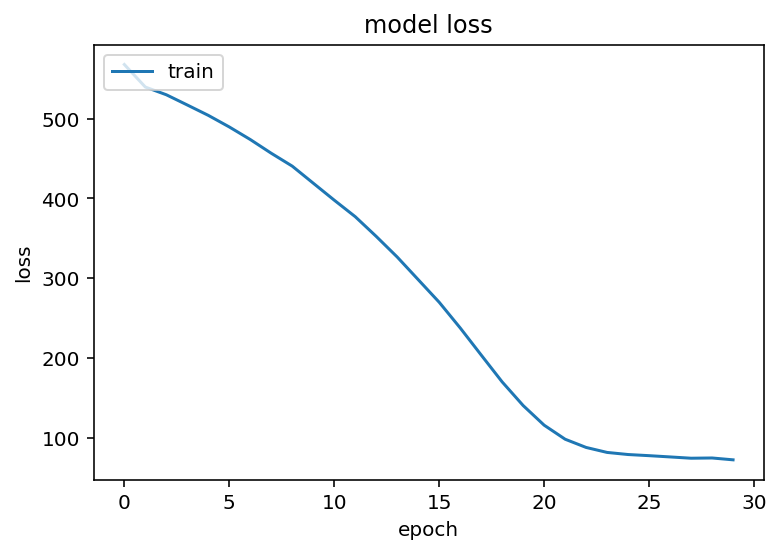

In [16]:
# 코드 3-25 학습 히스토리 그래프 그리기-1

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [0]:
# 코드 3-26 모델 생성 함수화

def create_model(input_shape):
  inputs = Input(shape=(input_shape,))
  fc1 = Dense(10, activation='relu')(inputs)
  fc2 = Dense(30, activation='relu')(fc1)
  outputs = Dense(1)(fc2)
  model = Model(inputs=inputs, outputs=outputs)
  return model

In [18]:
# 코드 3-27 모델 생성의 단순화

model = create_model(1)
model.summary()
model.compile(optimizer = 'RMSprop',
              loss='mean_squared_error')

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_5 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


In [19]:
# 3-28 검증 데이터를 추가한 모델 학습

history = model.fit(x_train_crim, y_train, 
                    validation_data=(x_test_crim, y_test),
                    epochs=30, batch_size=8)

Train on 404 samples, validate on 102 samples
Epoch 1/30
404/404 [==============================] - 0s 600us/step - loss: 564.0403 - val_loss: 579.9547
Epoch 2/30
404/404 [==============================] - 0s 155us/step - loss: 545.1403 - val_loss: 559.0143
Epoch 3/30
404/404 [==============================] - 0s 171us/step - loss: 530.1451 - val_loss: 540.0269
Epoch 4/30
404/404 [==============================] - 0s 160us/step - loss: 517.3826 - val_loss: 521.1017
Epoch 5/30
404/404 [==============================] - 0s 168us/step - loss: 503.4785 - val_loss: 503.7568
Epoch 6/30
404/404 [==============================] - 0s 167us/step - loss: 488.8814 - val_loss: 487.1220
Epoch 7/30
404/404 [==============================] - 0s 147us/step - loss: 473.2696 - val_loss: 470.0934
Epoch 8/30
404/404 [==============================] - 0s 159us/step - loss: 457.1565 - val_loss: 450.1809
Epoch 9/30
404/404 [==============================] - 0s 145us/step - loss: 436.8810 - val_loss: 429.7759


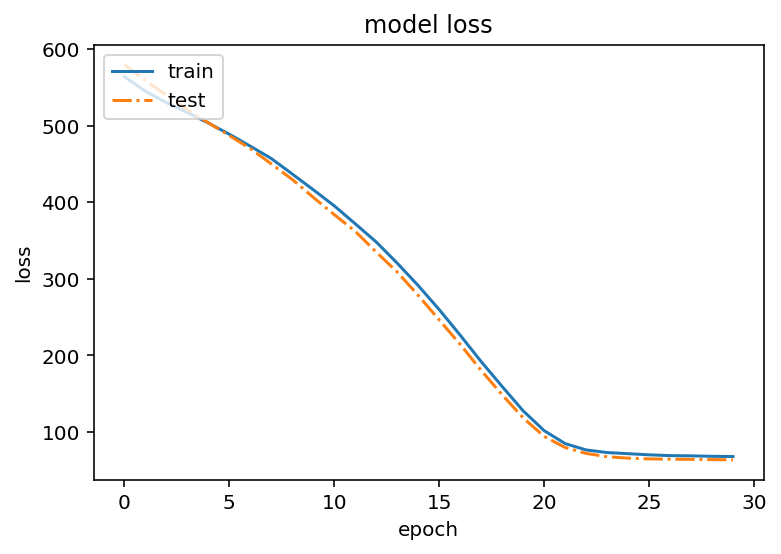

In [20]:
# 코드 3-29 학습 히스토리 그래프 그리기-2

plt.plot(history.history['loss'], '-')
plt.plot(history.history['val_loss'], '-.')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

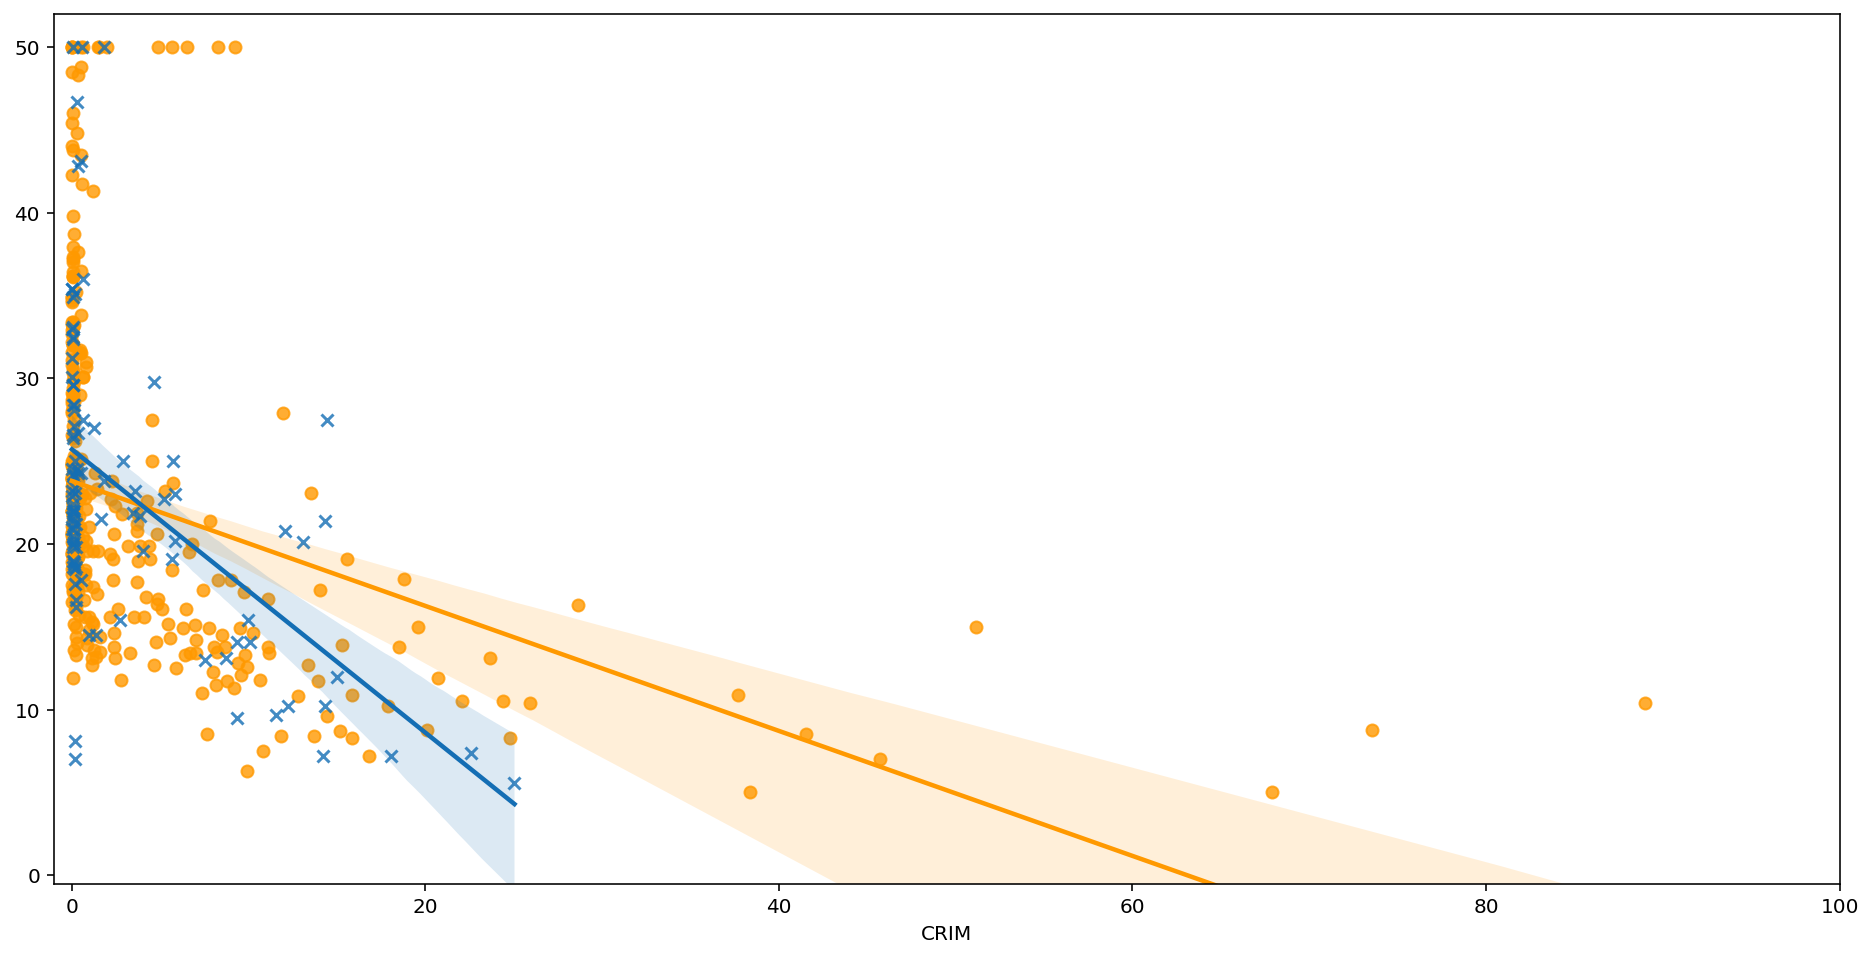

In [21]:
# 코드 3-30 Seaborn을 활용한 집값과 범죄율의 회귀 그래프-2

plt.figure(figsize=(16,8))
plt.axis([-1,100,-0.5,52])
sns.regplot(train_df['CRIM'], y_train, color='#ff9900', marker='o')
sns.regplot(test_df['CRIM'], y_test, color='#146EB4', marker='x')
plt.show()

In [0]:
# 코드 3-31 한정된 속성을 갖는 학습데이터 만들기

x_train_four = train_df[['CRIM', 'RM', 'AGE', 'PTRATIO']].values
x_test_four = test_df[['CRIM', 'RM', 'AGE', 'PTRATIO']].values

In [23]:
# 코드 3-32 모델 생성 및 컴파일

model = create_model(4)
model.summary()
model.compile(optimizer = 'RMSprop',
              loss = 'mean_squared_error')

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_8 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 31        
Total params: 411
Trainable params: 411
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 코드 3-33 검증셋을 추가한 모델 학습

history = model.fit(x_train_four, y_train,
                    validation_data=(x_test_four, y_test),
                    epochs=30, batch_size=8)

Train on 404 samples, validate on 102 samples
Epoch 1/30
404/404 [==============================] - 0s 649us/step - loss: 243.3651 - val_loss: 205.5454
Epoch 2/30
404/404 [==============================] - 0s 184us/step - loss: 169.0956 - val_loss: 170.1632
Epoch 3/30
404/404 [==============================] - 0s 182us/step - loss: 140.2109 - val_loss: 132.9600
Epoch 4/30
404/404 [==============================] - 0s 170us/step - loss: 109.5225 - val_loss: 101.3927
Epoch 5/30
404/404 [==============================] - 0s 197us/step - loss: 89.2708 - val_loss: 81.3392
Epoch 6/30
404/404 [==============================] - 0s 175us/step - loss: 77.2201 - val_loss: 68.5252
Epoch 7/30
404/404 [==============================] - 0s 163us/step - loss: 72.7448 - val_loss: 64.9631
Epoch 8/30
404/404 [==============================] - 0s 173us/step - loss: 70.3476 - val_loss: 62.4861
Epoch 9/30
404/404 [==============================] - 0s 183us/step - loss: 68.8351 - val_loss: 59.7334
Epoch 10/3

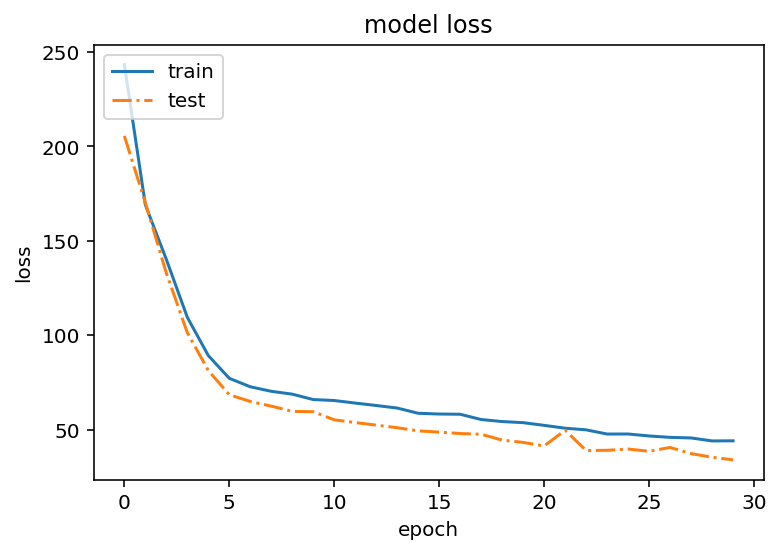

In [25]:
# 코드 3-29 학습 히스토리 그래프 그리기-2

plt.plot(history.history['loss'], '-')
plt.plot(history.history['val_loss'], '-.')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()